# <font color='#FFE15D'>**Week 13: Neural Networks 🧠**</font>

## **🔸 Imports**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import __main__

## **🔸 MLP (from Scratch)**

<img src="data/imgs/mlp-code.png" alt="string indexing" width=700 align="center" />

### Activation Function

In [28]:
def linear(x):
    return x

In [29]:
def relu(x):
    return np.maximum(0, x)

In [30]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [31]:
def tanh(x):
    pass

### Loss 

In [32]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [33]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

### Accuracy

In [34]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

### MLP

#### Steps to knowing class


In [35]:
all_layer_sizes = [2, 3, 5, 4, 3]

ws, bs = [], []
num_layers = len(all_layer_sizes)
for i in range(1, num_layers):
    w = np.random.randn(all_layer_sizes[i - 1], all_layer_sizes[i])
    b = np.random.randn(all_layer_sizes[i])

    ws.append(w)
    bs.append(b)

    print(i, w.shape, b.shape)

ws, bs

1 (2, 3) (3,)
2 (3, 5) (5,)
3 (5, 4) (4,)
4 (4, 3) (3,)


([array([[ 0.67716116, -2.0093326 ,  0.09001387],
         [ 0.54525012,  1.20457583,  0.59032366]]),
  array([[ 0.08996178,  1.30118904, -1.20641075,  0.02142621,  0.06557031],
         [-1.75392843,  0.79148993, -0.74708782,  1.88056515, -0.67529664],
         [-0.84409202,  2.68886677, -0.9601637 ,  0.03648936, -0.11888762]]),
  array([[-1.15758567,  1.16470164,  0.68726244, -0.57023162],
         [-0.55813407, -0.61327194, -0.46234412,  0.23777454],
         [ 0.93095128, -0.40089058,  1.30883506, -2.61352019],
         [-0.24580378, -2.0488573 , -0.19112917,  0.45308287],
         [-1.49186144,  1.08423566,  1.7285827 , -1.03677745]]),
  array([[-0.08388761, -0.14929175, -0.6143341 ],
         [ 1.88894156,  1.16069702,  1.01143275],
         [ 1.59820365,  1.73637983,  1.60747238],
         [ 0.67633114,  0.69248244, -0.30672316]])],
 [array([-0.49541166,  0.6242283 ,  0.1557522 ]),
  array([ 0.25170978,  1.68191641, -0.58620911,  0.70016147,  1.57369233]),
  array([1.81801126, 0

In [36]:
X=np.random.randn(10,2)

In [37]:
h = X.copy()
for i, (w, b) in enumerate(zip(ws, bs)):
    h = h @ w + b
    # h = f(h @ w + b) #we can define activation function
    print(i, h.shape)

0 (10, 3)
1 (10, 5)
2 (10, 4)
3 (10, 3)


#### Class


In [38]:
class MLP:
    def __init__(
        self,
        hidden_layer_sizes,
        hidden_activation="relu",
        output_size=1,
        output_activation="sigmoid",
        n_iter=1000,
        loss_fn=bce,
        eta=0.1,
    ):

        self.hidden_layer_sizes = hidden_layer_sizes  # List of hidden layer sizes
        self.hidden_activation = (
            hidden_activation  # Activation function for hidden layers
        )
        self.output_size = output_size  # Output layer size
        self.output_activation = (
            output_activation  # Activation function for output layer
        )
        self.n_iter = n_iter  # Number of iterations for training
        self.loss_fn = loss_fn  # Loss function for training
        self.eta = eta  # Learning rate

    def _init_weights(self):
        self.ws, self.bs = [], []  # Weight and bias lists for each layer
        all_layers = (
            [self.input_size] + self.hidden_layer_sizes + [self.output_size]
        )  # All layer sizes
        num_layers = len(all_layers)
        for i in range(1, num_layers):
            w = np.random.randn(
                all_layers[i - 1], all_layers[i]
            )  # Randomly initialize weights
            b = np.random.randn(all_layers[i])  # Randomly initialize biases
            self.ws.append(w)
            self.bs.append(b)

    def fit(self, X, y):
        n, self.input_size = X.shape  # Number of samples and input size
        self._init_weights()
        for _ in range(self.n_iter):
            y_hat = self.predict(X)  # Make predictions
            loss = self.loss_fn(y, y_hat)  # Compute loss
            self._gradient_descent(X, y, y_hat)  # Update weights and biases
            print(loss)  # Print loss

    def _gradient_descent(self, X, y, y_hat):
        delta = y_hat - y  # Compute difference between predicted and true values
        for j in range(len(self.ws) - 1, 0, -1):
            w_grad = (self.as_[j - 1].T @ delta) / len(y)  # Compute weight gradient
            b_grad = delta.mean(0)  # Compute bias gradient
            self.ws[j] -= self.eta * w_grad  # Update weights
            self.bs[j] -= self.eta * b_grad  # Update biases
            delta = (delta @ self.ws[j].T) * (
                self._activation_derivative(self.hs[j - 1], self.hidden_activation)
            )

    def predict(self, X):
        self.hs = []  # Hidden layer outputs
        self.as_ = []  # Activation function outputs
        for i, (w, b) in enumerate(zip(self.ws[:-1], self.bs[:-1])):
            a = (
                self.as_[i - 1].copy() if i > 0 else X.copy()
            )  # Input to the hidden layer
            self.hs.append(a @ w + b)  # Compute hidden layer output
            self.as_.append(
                self._activation_function(self.hs[i], self.hidden_activation)
            )  # Apply activation function
        y = self._activation_function(
            self.as_[-1] @ self.ws[-1] + self.bs[-1], self.output_activation
        )  # Output layer activation
        return y

    def _activation_function(self, x, activation):
        if activation == "relu":
            return np.maximum(0, x)  # ReLU activation
        elif activation == "sigmoid":
            return 1 / (1 + np.exp(-x))  # Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")

    def _activation_derivative(self, x, activation):
        if activation == "relu":
            return np.where(x > 0, 1, 0)  # Derivative of ReLU activation
        elif activation == "sigmoid":
            sigmoid = self._activation_function(x, "sigmoid")
            return sigmoid * (1 - sigmoid)  # Derivative of Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")

In [39]:
mlp = MLP([4, 3], output_size=1)#, output_activation=softmax)

In [40]:
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=2.0, 
                           n_classes=2, random_state=27)

mlp.fit(X, y[:, None])# Y bayad sotoni bashad
# mlp.predict(X)

1.5278184659707181
1.092405489406427
0.7421935860359008
0.5207593243988949
0.3962228764512006
0.32188695969368497
0.2753720455000667
0.24443811611033125
0.22266875344620166
0.20654474337403786
0.19405877557516799
0.184019126344713
0.17568715948676522
0.1685880027775064
0.16240695659195528
0.15693017012697602
0.15201036833589557
0.14753913163409962
0.14344016852872243
0.13965410621827554
0.13613551133267987
0.13284949478686345
0.1297685284262286
0.12686908666577873
0.12413341061072371
0.1215459006801394
0.1190932034986102
0.11676425408465671
0.11454905155584143
0.11243962184972096
0.11042869654084982
0.1085077221794956
0.10667073507039695
0.10491331046137518
0.1032304458628316
0.10161744973851008
0.10007079891824963
0.09858690184053402
0.0971618919259631
0.09579253518984839
0.09447513837712168
0.09320693511652832
0.09198599075270088
0.09081001559333306
0.08967671132004346
0.08858368986134174
0.08752867455049287
0.08650968844551714
0.08552490961288496
0.08457260348002073
0.08365171127849

<Axes: >

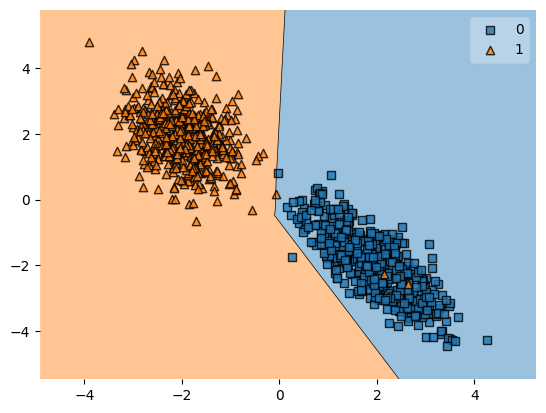

In [41]:
plot_decision_regions(X, y, mlp)

#### XOR

In [42]:
# Define the XOR problem inputs and outputs
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])

y = np.array([[0], 
              [1], 
              [1], 
              [0]])

In [43]:
xor = MLP(hidden_layer_sizes=[2], hidden_activation="relu", output_size=1, output_activation="sigmoid")
xor.fit(X, y)
xor.predict(X)

0.8672946685012108
0.8643239345305801
0.861474146167288
0.858737734193732
0.8561076311222128
0.8535772399147741
0.8511404041734004
0.8487913798272225
0.8465248083201324
0.8443356912837756
0.8422193666665296
0.8401714862780918
0.8381879947012008
0.8362651095162231
0.8343993027804747
0.8325872837018654
0.830825982445385
0.8291125350109142
0.8274442691215497
0.8258186910629616
0.8242334734160656
0.822686443627379
0.8211755733637588
0.8196989686006735
0.8182548603957174
0.8168415963016434
0.8154576323757644
0.8141015257450944
0.8127719276890651
0.8114675772040333
0.8101872950160857
0.8089299780108244
0.8076945940509062
0.806480177154068
0.8052858230062423
0.8041106847861031
0.8029539692790445
0.8018149332601257
0.8006928801269613
0.7995871567648908
0.798497150628009
0.7974222870208205
0.7963620265663703
0.795315862847713
0.7942833202105348
0.7932639517156165
0.7922573372306317
0.7912630816515436
0.7902808132445537
0.7893101821002079
0.7883508586918696
0.7874025325313275
0.7864649109148205


array([[0.5322135 ],
       [0.4814719 ],
       [0.52314318],
       [0.46477026]])

In [44]:
xor.ws, xor.bs

([array([[ 0.35025513, -0.95370317],
         [ 1.22207222, -0.22454624]]),
  array([[-0.19130766],
         [-1.67703179]])],
 [array([-0.12838513,  0.00360854]), array([0.13508436])])